# **Demo 1**

---



In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

%matplotlib inline

In [ ]:
      from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/PYTHON/Advertising.csv',index_col=0)
data.head()
data.columns = ['TV','Radio','Newspapers','Sales']


In [ ]:
data.head()

,TV,Radio,Newspapers,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.shape # 200 rows and 4 columns

(200, 4)

In [ ]:

data.isna().any()

TV            False
Radio         False
Newspapers    False
Sales         False
dtype: bool

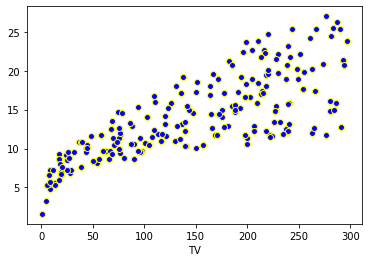

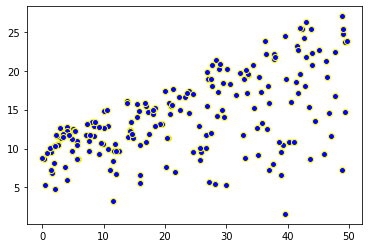

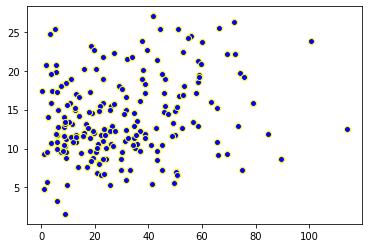

In [ ]:
plt.scatter(data['TV'],data['Sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.xlabel('TV')
plt.show()

plt.scatter(data['Radio'],data['Sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.show()
plt.scatter(data['Newspapers'],data['Sales'],color='blue',edgecolors='yellow',marker='o',alpha=1)
plt.show()

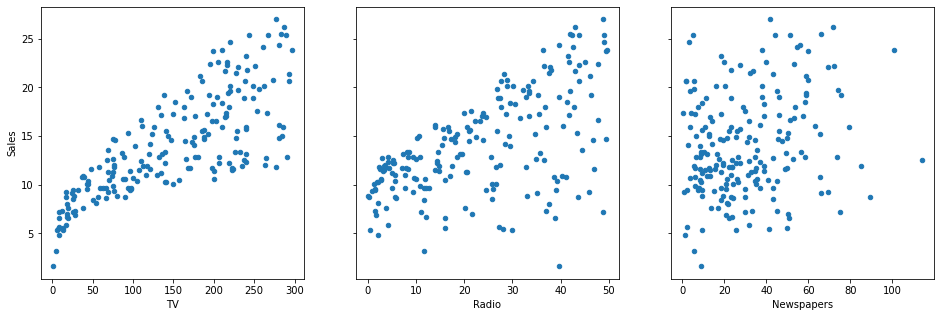

In [ ]:
fig, axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,5))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1],figsize=(16,5))
data.plot(kind='scatter',x='Newspapers',y='Sales',ax=axs[2],figsize=(16,5))

In [ ]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [ ]:
from sklearn.linear_model import LinearRegression
lm =  LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [ ]:
# Predict new values
X_new = pd.DataFrame({'TV':[50]})
X_new

,TV
0,50


In [ ]:
lm.predict(X_new)

array([9.40942557])

In [ ]:
X_new2 = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [ ]:
X_new2.head()

,TV
0,0.7
1,296.4


In [ ]:
preds  = lm.predict(X_new2)
preds

array([ 7.0658692 , 21.12245377])

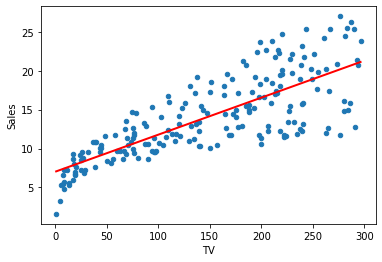

In [ ]:
data.plot(kind='scatter',x='TV',y='Sales')
plt.plot(X_new2,preds,c='red',linewidth=2)

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~ TV',data=data).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

**Using multiple linear regression**

In [ ]:
feature_cols = ['TV','Radio','Newspapers']
x = data[feature_cols]
y = data.Sales

In [ ]:
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_ )

prediction = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,prediction)))

2.7089490925159048
[0.04405928 0.1992875  0.00688245]
1.9485372043446385


In [ ]:
lm = smf.ols(formula='Sales~TV+Radio+Newspapers',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        03:11:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspapers    -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = smf.ols(formula = 'Sales~TV+Radio',data=data).fit()
lm.rsquared

0.8971942610828956

In [ ]:
# Adding a categorical feature in the dataset 
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums>0.5 # mask large contains True/False values
data['Size'] = 'small'
data.loc[mask_large,'Size'] =  'large' # Therefore where ever there is true in mask_large at that place large comes
print(mask_large)
data.head()

[ True False False False  True  True  True  True  True  True  True  True
 False False False  True  True  True  True  True  True  True False False
 False  True  True  True  True False False  True  True False False  True
  True False  True  True  True  True  True False False False False False
  True False  True False  True  True  True False False False  True  True
 False False  True False False  True  True  True  True  True  True False
 False  True  True False False  True False  True  True  True False  True
 False False False False  True False  True  True  True  True False  True
 False  True  True False False False  True False False  True  True  True
  True  True  True False  True False False  True  True  True  True False
  True  True False  True  True  True False False False False False False
  True  True  True False False  True  True False False  True False False
 False  True False  True False False  True  True False False False  True
  True  True False  True False False False False  T

,TV,Radio,Newspapers,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [ ]:
data['IsLarge'] = data.Size.map({'small':0,'large':1})
data.head()

,TV,Radio,Newspapers,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [ ]:
feature_cols = ['TV','Radio','Newspapers','IsLarge']
X = data[feature_cols]
y = data.Sales
lm = LinearRegression()
lm.fit(X,y)
zip(feature_cols,lm.coef_)

In [ ]:
np.random.seed(123456)
nums = np.random.rand(len(data))
mask_surburban = (nums>0.33) & (nums<0.66)
mask_urban = nums>0.66
data['Area'] = 'rural'
data.loc[mask_surburban,'Area'] = 'surburban'
data.loc[mask_urban,'Area'] = 'urban'
data.head()

,TV,Radio,Newspapers,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,surburban


In [ ]:
area_dummies = pd.get_dummies(data.Area,prefix='Area').iloc[:,1:] # .iloc[:,1:] prints the values skipping 'Area_rural' 
                                                                  #column and giving only the other two columns
print(area_dummies)

data = pd.concat([data,area_dummies],axis=1)
data

     Area_surburban  Area_urban
1                 0           0
2                 0           1
3                 0           0
4                 0           1
5                 1           0
..              ...         ...
196               1           0
197               0           1
198               1           0
199               0           0
200               0           0

[200 rows x 2 columns]


,TV,Radio,Newspapers,Sales,Size,IsLarge,Area,Area_surburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,surburban,1,0
...,...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,small,0,surburban,1,0
197,94.2,4.9,8.1,9.7,small,0,urban,0,1
198,177.0,9.3,6.4,12.8,small,0,surburban,1,0
199,283.6,42.0,66.2,25.5,small,0,rural,0,0


In [ ]:
feature_cols = ['TV','Radio','Newspapers','IsLarge','Area_surburban','Area_urban']
x = data[feature_cols]
y = data.Sales
lm = LinearRegression()
lm.fit(x,y)

print(lm.intercept_)
print(feature_cols,lm.coef_)


2.874190989087918
['TV', 'Radio', 'Newspapers', 'IsLarge', 'Area_surburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
